Notes from [Introduction to Synthetic Aperture Radar Using Python and MATLAB](https://ieeexplore.ieee.org/document/9893146).
# Imaging Modes

## Synthetic Aperture Radar Introduction

Synthetic Aperture Radar (SAR) is an imaging technique that is capable of generating high-resolution images in all weather conditions. SAR imaging modes usually operate using a moving platform with a side-looking geometry. Radar pulses are emitted as the platform moves, and the motion is used to form a *synthetic aperture*. The received pulses are then combined to form an image. The pulses are usually *linear frequency modulated (LFM)* waveforms, which are also known as *chirps*. In SAR geometry, there are two different kinds of "time": fast time and slow time. *Fast time* is the time related to the pulses. *Slow time* is the time related to the motion of the platform. Unlike most imaging, SAR data needs to be processed to be interpretable. The form of the raw data changes depending on the exact platform and implementation. There are also many different ways of forming a SAR image.

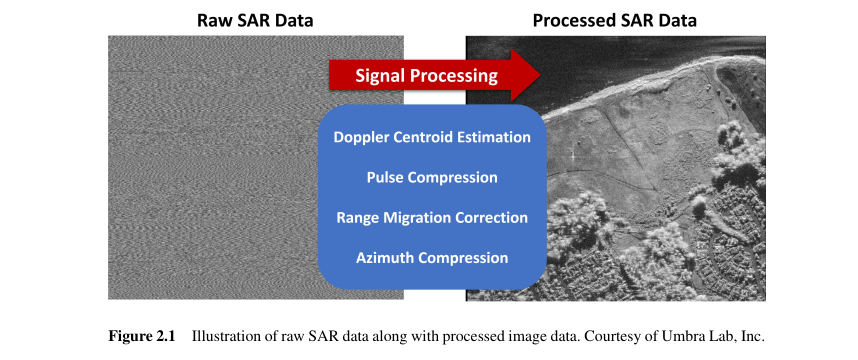

## Stripmap

#### Intro and Geometry

Stripmap imaging was the first imaging mode used in SAR systems. Generally, as the platform moves, it points at a fixed look angle $\theta_l$ illuminates a section of the ground called the *ground swath*. The illumination is done via a continuous sequence of pulses, and the shape of the ground swath is usually an ellipse. The ellipse moves across the ground in the direction of the platforms motion, which is known as the *cross range* direction.

The size of the ground swath can be kilometers to hundreds of kilometers. It's width can be related to the antenna's footprint, using the classical expression for the Rayleigh resolution for a finite aperture
$$ W_g\approx{\frac{\lambda R_0}{D_{\mu}}} \text{\;\;(m)} $$ 
where<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;$ \lambda = \text{wavelength (m)}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$ R_0 = \text{slant range to swath midpoint (m)}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$ D_{\mu} = \text{verticle antenna height (m)}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$ W_g = \text{width of the ground swath (m)}$<br>

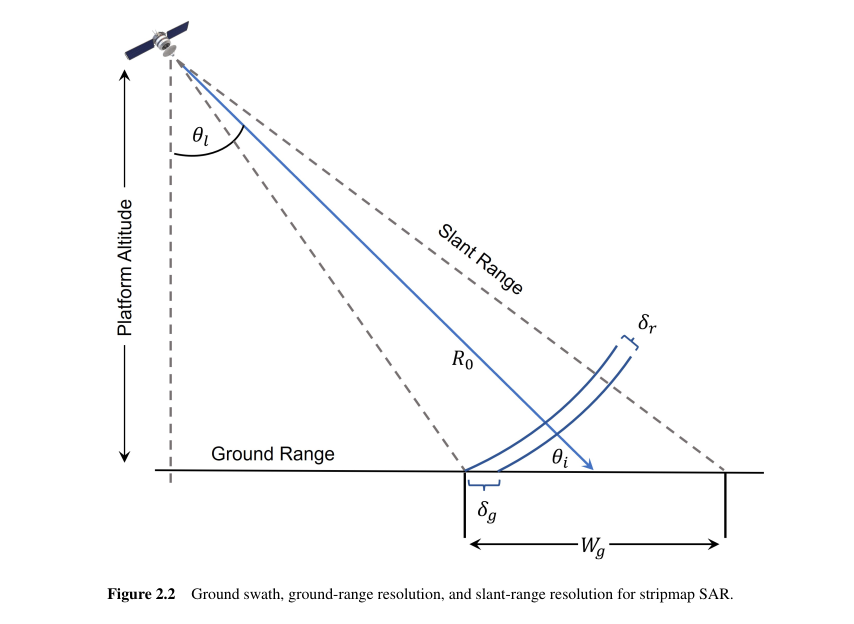

#### Resolution

The slant-range resolution is casually related to the bandwidth of the waverform by
$$ \delta_r = \frac{c}{2B}\text{\;\;(m)}$$
where<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;$c = \text{speed of light (m/s)}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$B = \text{bandwidth (Hz)}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$\theta_r = \text{slant-plane range resolution (m)}$<br>
<br>
The theoretical limit on range resolution is $\delta_{r}$. Many factors, including sampling rate, modulation, quantization, and windowing, will reduce the range resolution that a radar can achieve. The resolution in the ground plane is related to $\delta_{r}$ and the incident angle $\theta_{i}$ by
$$ \delta_g = \frac{c}{2B\cos(\theta_i)}\text{\;\;(m)}$$
In the cross-range (also called azimuth) direction, the resolution is a fraction of the antennas physical size $D_\alpha$ - expressed as
$$\delta_{\alpha} = \frac{D_{\alpha}}{2}\text{\;\;(m)}$$
So the azimuth resolution is not related to range. The azimuth resolution is also finer in platforms with smaller sensors, since they result in a beamwidth and synthetic aperture. The expression for azimuth resolution assumes that the synthetic aperture covers the support band - a subset of the interval $[\frac{-L_{sa}}{2}, \frac{L_{sa}}{2}]$ where $L_{sa}$ is the synthetic aperture length. The *support band* is given by 
$$ b \in [-\frac{L_{span}}{2}-\frac{R_0\lambda}{2D_{\alpha}}, \frac{L_{span}}{2}+\frac{R_0\lambda}{2D_{\alpha}}]\text{\;\;(m)}$$
where<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;$L_{span} = \text{cross-range span of the image area (m)}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$\lambda = \text{wavelength (m)}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$b = \text{support band of the image area (m)}$<br>

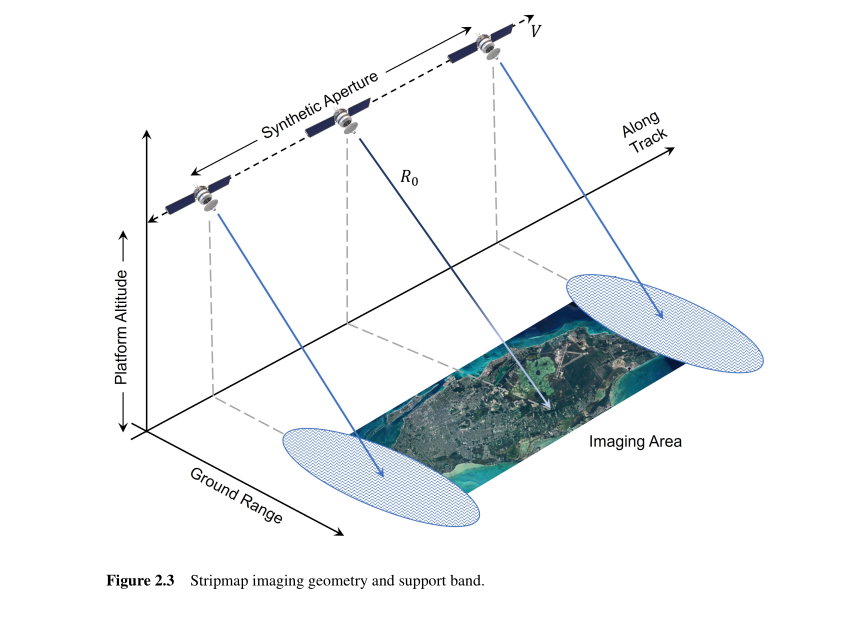

Consider a point target, for example. Given that its span is 0, the support band is
$$ b \in [-\frac{R_0\lambda}{2D_{\alpha}}, \frac{R_0\lambda}{2D_{\alpha}}]\text{\;\;(m)}$$
Thus, the synthetic aperture must obey
$$ L_{sa} > \frac{R_0\lambda}{D_{\alpha}} \text{\;\;(m)} $$
The expressions for the ground-range and azimuth resolutions are based on the approximation of the target spectral support region as a rectangle. This region is described by the span
$$ \Delta k_x = 2(k_{max} - k_{min}) \text{\;\;(rad/m)} $$
$$ \Delta k_y = \frac{4\pi}{D_{\alpha}} \text{\;\;(rad/m)} $$